<a href="https://colab.research.google.com/github/ahmadshajhan/Ahmad/blob/main/03_intoduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to Convolutional Neural Network and Compurt Vision with TensorFlow

###Get the data

In [1]:
import os
import zipfile

# 1. Download the dataset using the UPDATED URL
!wget --no-check-certificate \
    https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

# 2. Extract the zip file
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# 3. Define the directory paths
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

print(f"Dataset extracted to: {base_dir}")
print("Classes inside train folder:", os.listdir(train_dir))

--2026-02-26 19:59:28--  https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving download.mlcc.google.com (download.mlcc.google.com)... 108.177.11.94, 2607:f8b0:400c:c01::5e
Connecting to download.mlcc.google.com (download.mlcc.google.com)|108.177.11.94|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.google.com/mlcc/mledu-datasets/cats_and_dogs_filtered.zip [following]
--2026-02-26 19:59:28--  https://dl.google.com/mlcc/mledu-datasets/cats_and_dogs_filtered.zip
Resolving dl.google.com (dl.google.com)... 173.194.215.91, 173.194.215.136, 173.194.215.190, ...
Connecting to dl.google.com (dl.google.com)|173.194.215.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   188MB/s    in 0.3s    

2026-02-26 19:59:29 (188 MB/s) - ‘/content/cats_and_dogs_filtered.zip

In [2]:
! ls cats_and_dogs_filtered

train  validation  vectorize.py


In [3]:
! ls cats_and_dogs_filtered/train

cats  dogs


In [4]:
import os
for dirpath, dirnames, filenames in os.walk("cats_and_dogs_filtered"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.")

There are 2 directories and 1 images in 'cats_and_dogs_filtered.
There are 2 directories and 0 images in 'cats_and_dogs_filtered/train.
There are 0 directories and 1000 images in 'cats_and_dogs_filtered/train/cats.
There are 0 directories and 1000 images in 'cats_and_dogs_filtered/train/dogs.
There are 2 directories and 0 images in 'cats_and_dogs_filtered/validation.
There are 0 directories and 500 images in 'cats_and_dogs_filtered/validation/cats.
There are 0 directories and 500 images in 'cats_and_dogs_filtered/validation/dogs.


In [5]:
!ls -la cats_and_dogs_filtered

total 20
drwxr-xr-x 4 root root 4096 Feb 26 19:59 .
drwxr-xr-x 1 root root 4096 Feb 26 19:59 ..
drwxr-xr-x 4 root root 4096 Feb 26 19:59 train
drwxr-xr-x 4 root root 4096 Feb 26 19:59 validation
-rw-r--r-- 1 root root  140 Feb 26 19:59 vectorize.py


In [6]:
# Anotehr way to find how may images are in file
num_dog_image_train = len(os.listdir('cats_and_dogs_filtered/train/dogs'))
num_dog_image_train

1000

In [7]:
num_cat_image_train = len(os.listdir('cats_and_dogs_filtered/train/cats'))
num_cat_image_train

1000

To visualize our images , first let's get the classes names programmatically

In [8]:
import pathlib
import numpy as np

data_dir = pathlib.Path("cats_and_dogs_filtered/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cats' 'dogs']


In [9]:
# Lets's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os # Import os module for path joining

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = os.path.join(target_dir, target_class) # Use os.path.join for correct path construction
  print(target_folder)

  # Get a random image path
  random_image  = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplot lib
  img = mpimg.imread(os.path.join(target_folder, random_image[0])) # Use os.path.join here too
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

cats_and_dogs_filtered/train/dogs
['dog.333.jpg']
Image shape: (500, 471, 3)


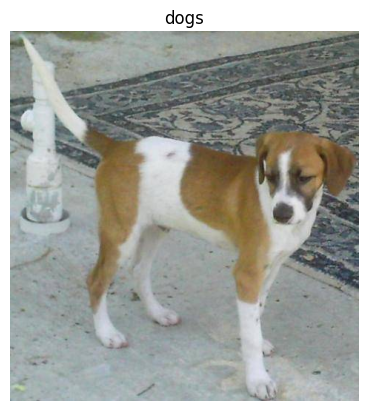

In [10]:
# View random image from the training dataset
img = view_random_image(target_dir="cats_and_dogs_filtered/train/",
                        target_class="dogs")

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(500, 471, 3), dtype=uint8, numpy=
array([[[137, 153, 153],
        [134, 150, 149],
        [126, 140, 140],
        ...,
        [136, 143, 125],
        [137, 144, 126],
        [137, 144, 126]],

       [[145, 159, 160],
        [144, 158, 159],
        [140, 154, 154],
        ...,
        [133, 140, 124],
        [135, 142, 124],
        [137, 144, 128]],

       [[149, 160, 164],
        [148, 159, 161],
        [148, 160, 160],
        ...,
        [126, 132, 118],
        [125, 132, 116],
        [124, 130, 116]],

       ...,

       [[142, 159, 166],
        [147, 164, 171],
        [153, 171, 175],
        ...,
        [169, 173, 174],
        [171, 175, 176],
        [173, 177, 178]],

       [[133, 150, 157],
        [140, 157, 164],
        [149, 167, 171],
        ...,
        [170, 174, 175],
        [171, 175, 176],
        [172, 176, 177]],

       [[129, 146, 153],
        [137, 154, 161],
        [149, 167, 171],
        ...,
        [166, 170, 17

In [12]:
img.shape

(500, 471, 3)

In [13]:
# Get all the pxel values b/w 0 & 1
img/255.

array([[[0.5372549 , 0.6       , 0.6       ],
        [0.5254902 , 0.58823529, 0.58431373],
        [0.49411765, 0.54901961, 0.54901961],
        ...,
        [0.53333333, 0.56078431, 0.49019608],
        [0.5372549 , 0.56470588, 0.49411765],
        [0.5372549 , 0.56470588, 0.49411765]],

       [[0.56862745, 0.62352941, 0.62745098],
        [0.56470588, 0.61960784, 0.62352941],
        [0.54901961, 0.60392157, 0.60392157],
        ...,
        [0.52156863, 0.54901961, 0.48627451],
        [0.52941176, 0.55686275, 0.48627451],
        [0.5372549 , 0.56470588, 0.50196078]],

       [[0.58431373, 0.62745098, 0.64313725],
        [0.58039216, 0.62352941, 0.63137255],
        [0.58039216, 0.62745098, 0.62745098],
        ...,
        [0.49411765, 0.51764706, 0.4627451 ],
        [0.49019608, 0.51764706, 0.45490196],
        [0.48627451, 0.50980392, 0.45490196]],

       ...,

       [[0.55686275, 0.62352941, 0.65098039],
        [0.57647059, 0.64313725, 0.67058824],
        [0.6       , 0

## An end-to-end example


Let's build a con neural network to find patterns

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                          target_size=(224, 224),
                                               batch_size=32,
                                          class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                          target_size=(224, 224),
                                               batch_size=32,
                                          class_mode="binary",
                                               seed=42)
#Build a CNN model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our modle
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
# Fit the modle
history = model_1.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - accuracy: 0.5086 - loss: 0.6981 - val_accuracy: 0.5860 - val_loss: 0.6706
Epoch 2/10
 7/63 ━━━━━━━━━━━━━━━━━━━━ 1:59 2s/step - accuracy: 0.6513 - loss: 0.6556

##Using the same model

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the tensor flow palyground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
history_2 = model_2.fit(train_data, epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data
                        ,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


In [ ]:
model_3.summary()

In [ ]:
model_1.summary()

## Binary classification lets's break it Down

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
cat_img = view_random_image("cats_and_dogs_filtered/train/", "cats")
plt.subplot(1, 2, 2)
dog_img = view_random_image("cats_and_dogs_filtered/train/", "dogs")

In [ ]:
train_dir = "cats_and_dogs_filtered/train/"
test_dir = "cats_and_dogs_filtered/validation/"

In [ ]:
!nvidia-smi

In [ ]:
# Create a train and test data generater and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data frm directoriess
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

In [ ]:
# Get a sample
images, labels = next(train_data) #get the "next" batch of image/label in the datsets
len(images), len(labels)

In [ ]:
len(train_data)

In [ ]:
2000/32

In [ ]:
# Get the first two images
images[:2], images[0].shape

In [ ]:
images[7].shape

In [ ]:
# View the first batch of labels
labels

###3. Create a CNN model (start with a baseline)

In [ ]:
# Make the creating of our model a liittle easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224, 224, 3),
           strides=1,
           padding="valid",
    ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data, validation_steps=len(test_data))

##Evaluate our model

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# PLot the validation and traning curve seprately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics

  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();

In [ ]:
# Checkout the loss and accuracy
plot_loss_curves(history_4)

### 6. Adjust the model parameters

In [ ]:
# Create the mdeol
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


In [ ]:
model_5.summary()

In [ ]:
#Plot loss curves
plot_loss_curves(history_5)

### Data Agumentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
# Create ImageDataGeneration without Data Agumentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without Data Agumentation
test_datagen = ImageDataGenerator(rescale=1/255.)



from ast import pattern
>>>What is DataAgumentation?
>>>Data Agumentation is a technique to increase the dataset.
>>>Altering Our Traning tf.data
>>>Leading it To have more diversity and in turn allowing
our model to learning more generalizable patterns

In [ ]:
# Import Data and agumented it from traning directory
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 222),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   seed=42,
                                                                   shuffle=False)
# Import data but do not agument it from traning directory
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=False)
#Create non-agmented test Data
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             seed=42,
                                             )



In [ ]:
# Get some sample AAgumented Data
aug_images, aug_labels = next(train_data_augmented)

image, label = next(train_data)
len(images), len(labels)
len(aug_images), len(aug_labels)


In [ ]:
import random

random_number = random.randint(0, 32)
print(f"Show Image Number: {random_number}")
print(f"Original Image Shape: {image[random_number].shape}")
print(f"Augmented Image Shape: {aug_images[random_number].shape}")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # ✅ create subplots FIRST

axes[0].imshow(image[random_number])
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(aug_images[random_number])
axes[1].set_title("Augmented Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Create a model (smae as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
#Check our models training curves
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary', # Changed from 'categorical' to 'binary'
                                                                            shuffle=True)

In [ ]:
# Create a model (same as model_5 and model_6)
model_7 = Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),   # ← preferred approach
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=7,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Plot the losss curves
plot_loss_curves(history_7)

In [ ]:
import torch

# Dynamically set the device to GPU (CUDA or MPS) if available, otherwise fallback to CPU
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available(): # For Apple Silicon GPUs (M1, M2, etc.)
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Code running on device: {device}")


In [ ]:
###7 Repeat until satisfied

In [ ]:
import  matplotlib.image as mpimg
# Using a different, publicly accessible image URL
!wget -O 03-cat.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg
cat = mpimg.imread("03-cat.jpg")

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cat)
plt.axis(False)

In [ ]:
cat.shape

In [ ]:
expanded_cat = tf.expand_dims(cat, axis=0)
expanded_cat.shape

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape,, color_channels)
  """
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image
  img = img/255.
  return img

In [ ]:
#Load and preprocess our ustom image
custom_image = load_and_prep_image("03-cat.jpg")
custom_image.shape

In [ ]:
expanded_cat = tf.expand_dims(custom_image, axis=0)
expanded_cat.shape

In [ ]:
model_7.predict(expanded_cat)

In [ ]:
class_names

In [ ]:
# we can index predicts class by rounding  the prdiction probablity and indexing it on the class anmes
pred_class = class_names[int(tf.round(model_7.predict(expanded_cat)))]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imprtes an image located at filename, makes a prediction with model and plots the image with the prediction
  """
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  #PLot the image and predicted image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
#Test our model on a custoom image

In [ ]:
pred_and_plot(model_7, "03-cat.jpg", class_names)

In [ ]:
# ============================================================
# MODEL 8 — Transfer Learning (Feature Extraction)
# Continuing from your notebook style
# ============================================================

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

tf.random.set_seed(42)

# ─────────────────────────────────────────
# Step 1: Better Data Generators
# (Same dirs you already have: train_dir, test_dir)
# ─────────────────────────────────────────

# Note: EfficientNetB0 has built-in preprocessing,
# so NO rescale=1/255 needed!
train_datagen_8 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen_8 = ImageDataGenerator()  # No augmentation on test data

train_data_8 = train_datagen_8.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True,          # ← Always shuffle training data!
    seed=42
)

test_data_8 = test_datagen_8.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False,
    seed=42
)

# ─────────────────────────────────────────
# Step 2: Load EfficientNetB0 base (pre-trained on ImageNet)
# ─────────────────────────────────────────

base_model = EfficientNetB0(
    include_top=False,        # Remove ImageNet classification head
    weights="imagenet",       # Use pre-trained weights!
    input_shape=(224, 224, 3)
)

# Freeze ALL base layers (we only train our new head for now)
base_model.trainable = False

print(f"Base model layers: {len(base_model.layers)}")
print(f"Trainable variables: {len(base_model.trainable_variables)}")

# ─────────────────────────────────────────
# Step 3: Build model_8 on top of base
# ─────────────────────────────────────────

inputs = tf.keras.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False)       # training=False → keeps BatchNorm frozen
x = GlobalAveragePooling2D(name="global_avg_pool")(x)
x = BatchNormalization(name="batch_norm")(x)
x = Dense(256, activation="relu", name="dense_256")(x)
x = Dropout(0.5, name="dropout_1")(x)
x = Dense(128, activation="relu", name="dense_128")(x)
x = Dropout(0.3, name="dropout_2")(x)
outputs = Dense(1, activation="sigmoid", name="output")(x)

model_8 = tf.keras.Model(inputs, outputs, name="model_8_feature_extraction")

model_8.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

model_8.summary()

# ─────────────────────────────────────────
# Step 4: Callbacks (same pattern as your notebook)
# ─────────────────────────────────────────

callbacks_8 = [
    EarlyStopping(
        monitor="val_accuracy",
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        "model_8_best.keras",
        monitor="val_accuracy",
        save_best_only=True,
        verbose=1
    )
]

# ─────────────────────────────────────────
# Step 5: Phase 1 — Feature Extraction
#          (base frozen, only train the head)
#          Expected: ~85–92% val accuracy
# ─────────────────────────────────────────

print("\n" + "="*55)
print("PHASE 1: Feature Extraction (EfficientNetB0 frozen)")
print("="*55)

history_8_phase1 = model_8.fit(
    train_data_8,
    epochs=10,
    steps_per_epoch=len(train_data_8),
    validation_data=test_data_8,
    validation_steps=len(test_data_8),
    callbacks=callbacks_8
)

# Plot phase 1 curves (using your existing function!)
plot_loss_curves(history_8_phase1)

# ─────────────────────────────────────────
# Step 6: Phase 2 — Fine-Tuning
#          Unfreeze top 30 layers of base model
#          Use a MUCH smaller LR to avoid destroying weights
#          Expected: ~95–100% val accuracy
# ─────────────────────────────────────────

print("\n" + "="*55)
print("PHASE 2: Fine-Tuning (top 30 layers unfrozen)")
print("="*55)

# Unfreeze the base model
base_model.trainable = True

# Re-freeze all layers EXCEPT the last 30
for layer in base_model.layers[:-30]:
    layer.trainable = False

print(f"Total layers in base: {len(base_model.layers)}")
print(f"Trainable layers now: {sum(1 for l in base_model.layers if l.trainable)}")

# CRITICAL: Recompile with 100x smaller learning rate
model_8.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-5),   # Very small LR for fine-tuning!
    metrics=["accuracy"]
)

history_8_phase2 = model_8.fit(
    train_data_8,
    epochs=15,
    steps_per_epoch=len(train_data_8),
    validation_data=test_data_8,
    validation_steps=len(test_data_8),
    callbacks=callbacks_8
)

# Plot phase 2 curves
plot_loss_curves(history_8_phase2)

# ─────────────────────────────────────────
# Step 7: Plot COMBINED training history
# (both phases together, like your plot_loss_curves style)
# ─────────────────────────────────────────

def plot_combined_history(h1, h2):
    """Combines two training histories and plots them together"""
    acc      = h1.history["accuracy"]     + h2.history["accuracy"]
    val_acc  = h1.history["val_accuracy"] + h2.history["val_accuracy"]
    loss     = h1.history["loss"]         + h2.history["loss"]
    val_loss = h1.history["val_loss"]     + h2.history["val_loss"]
    epochs   = range(len(acc))
    split    = len(h1.history["accuracy"])  # Where fine-tuning starts

    plt.figure(figsize=(14, 5))

    # --- Loss ---
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss,     label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.axvline(x=split, color="gray", linestyle="--", label="Fine-tune start")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # --- Accuracy ---
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc,     label="training_accuracy")
    plt.plot(epochs, val_acc, label="val_accuracy")
    plt.axvline(x=split, color="gray", linestyle="--", label="Fine-tune start")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_combined_history(history_8_phase1, history_8_phase2)

# ─────────────────────────────────────────
# Step 8: Final Evaluation
# ─────────────────────────────────────────

loss_8, acc_8 = model_8.evaluate(test_data_8)
print(f"\n✅ model_8 Final Test Accuracy: {acc_8 * 100:.2f}%")
print(f"✅ model_8 Final Test Loss:     {loss_8:.4f}")

# ─────────────────────────────────────────
# Step 9: Predict on custom image
# (using your existing pred_and_plot function!)
# ─────────────────────────────────────────

# Test on your cat image
pred_and_plot(model_8, "03-cat.jpg", class_names)

In [ ]:
# ─────────────────────────────────────────
# Predict & Plot on a custom URL image
# ─────────────────────────────────────────

import requests # Keep requests import, though not used for download below.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np

# Step 1: Download the image from URL
# Using a different, publicly accessible image URL (e.g., a dog image from Wikimedia Commons)
url = "https://images.litter-robot.com/media/wysiwyg/abyssinian-cat7.png"
img_path = "custom_test_image.jpg"

# Use !wget for a more reliable download
!wget --no-check-certificate {url} -O {img_path}

print(f"✅ Image downloaded to: {img_path}")

# Step 2: Load and prep the image
# (using your existing load_and_prep_image function — NO rescale since EfficientNetB0 handles it)
def load_and_prep_image_efficientnet(filename, img_shape=224):
    """
    Reads image, resizes to (img_shape, img_shape, 3).
    NO manual rescaling — EfficientNetB0 has built-in preprocessing.
    """
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)   # force 3 channels (RGB)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # NO img/255. here — EfficientNetB0 preprocesses internally
    return img

# Step 3: Predict
custom_image = load_and_prep_image_efficientnet(img_path)
img_expanded = tf.expand_dims(custom_image, axis=0)   # shape: (1, 224, 224, 3)

pred_prob = model_8.predict(img_expanded)[0][0]
pred_class = class_names[int(tf.round(pred_prob))]
confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob

print(f"\n🔍 Prediction : {pred_class.upper()}")
print(f"📊 Confidence : {confidence * 100:.2f}%")
print(f"   (Raw prob  : {pred_prob:.4f}  → 0=cats, 1=dogs)")

# Step 4: Plot — matching your notebook's pred_and_plot style
plt.figure(figsize=(8, 6))
plt.imshow(custom_image / 255.)          # divide only for display
plt.title(
    f"Prediction: {pred_class.upper()}\nConfidence: {confidence * 100:.2f}%",
    fontsize=14,
    fontweight="bold",
    color="green" if confidence > 0.85 else "orange"
)
plt.axis(False)
plt.tight_layout()
plt.show()

In [ ]:
# Install kagglehub (run this once in your Colab notebook)
!pip install -q kagglehub

import kagglehub
import os

# 1. Download the dataset using kagglehub (handles downloading and extracting automatically)
print("Downloading dataset...")
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

# 2. Define the directory paths
# This specific dataset extracts into an 'animals/animals' nested folder structure
base_dir = os.path.join(path, 'animals', 'animals')

# Fallback just in case the extraction path varies slightly
if not os.path.exists(base_dir):
    base_dir = path

print(f"\nDataset extracted to: {base_dir}")

# 3. List the classes (the 90 animal folders)
classes = sorted(os.listdir(base_dir))

print(f"Total classes found: {len(classes)}")
print("First 10 classes inside the folder:", classes[:10])

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk(base_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
import os
import shutil
import random

# 1. Define where you want your new split folders to live
split_dataset_dir = '/content/animal_dataset_split'
train_dir = os.path.join(split_dataset_dir, 'train')
test_dir = os.path.join(split_dataset_dir, 'test')

# 2. Set your split ratio (80% for training, 20% for testing)
split_ratio = 0.8

# 3. Create the empty train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get all the 90 animal class folders
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

print("Splitting images into train and test folders...")

# 4. Loop through each animal folder and split the files
for animal_class in classes:
    class_path = os.path.join(base_dir, animal_class)

    # Create the specific animal folders inside train and test
    os.makedirs(os.path.join(train_dir, animal_class), exist_ok=True)
    os.makedirs(os.path.join(test_dir, animal_class), exist_ok=True)

    # Get all images for this animal and shuffle them
    images = os.listdir(class_path)
    random.shuffle(images)

    # Calculate how many images go to training
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Copy images to their new train destination
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, animal_class, img)
        shutil.copy(src, dst)

    # Copy images to their new test destination
    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(test_dir, animal_class, img)
        shutil.copy(src, dst)

print(f"Done! Your split dataset is ready at: {split_dataset_dir}")

In [ ]:
import kagglehub
import os
import shutil
import random

# 1. Download the dataset using kagglehub
print("Downloading dataset...")
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

# The downloaded dataset is usually nested inside an 'animals/animals' folder
original_data_dir = os.path.join(path, 'animals', 'animals')
if not os.path.exists(original_data_dir):
    original_data_dir = path # Fallback just in case

# 2. Define your target train_dir and test_dir variables
base_dir = '/content/animal_dataset_split'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create the empty base directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 3. Set your split ratio (80% train, 20% test)
split_ratio = 0.8

print("Splitting images into train and test folders. This might take a moment...")

# Get all the 90 animal class folders
classes = [d for d in os.listdir(original_data_dir) if os.path.isdir(os.path.join(original_data_dir, d))]

# 4. Loop through each animal folder and distribute the files
for animal_class in classes:
    class_path = os.path.join(original_data_dir, animal_class)

    # Create the specific animal folders inside your new train_dir and test_dir
    train_class_dir = os.path.join(train_dir, animal_class)
    test_class_dir = os.path.join(test_dir, animal_class)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Get all images for this animal and shuffle them
    images = os.listdir(class_path)
    random.shuffle(images)

    # Calculate the split index
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Copy images to the train_dir
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))

    # Copy images to the test_dir
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

print("\nSuccess! Dataset successfully split.")
print(f"Training directory ready at: {train_dir}")
print(f"Testing directory ready at: {test_dir}")

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

###2. Preprocess our data(prepare it for model)

###Prepare the data(prepare it for model)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


#Load data in directories and turn into  batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42,
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

## 3. Create a model(start with base line)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


In [ ]:
tf.random.set_seed(42)
model_9 = Sequential([
    Conv2D(10, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(10, (3, 3), activation='relu'),
    Conv2D(10, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(len(class_names), activation='softmax') # Changed from 10 to len(class_names) (90 classes)
])

# Compile our model
model_9.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

#Fit the model
history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

In [ ]:
model_9.summary()

### 5. Evaluate the model

In [ ]:
model_9.evaluate(test_data)

In [ ]:
plot_loss_curves(history=history_9)

In [ ]:
tf.random.set_seed(42)

model_10 = Sequential([
    Conv2D(10, 3,activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])


model_10.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))


In [ ]:
pred_and_plot(model_10, "03-cat.jpg", class_names)